<a href="https://colab.research.google.com/github/MahiraMohammed/Student-depression-prediction/blob/main/Student_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student depression prediction**

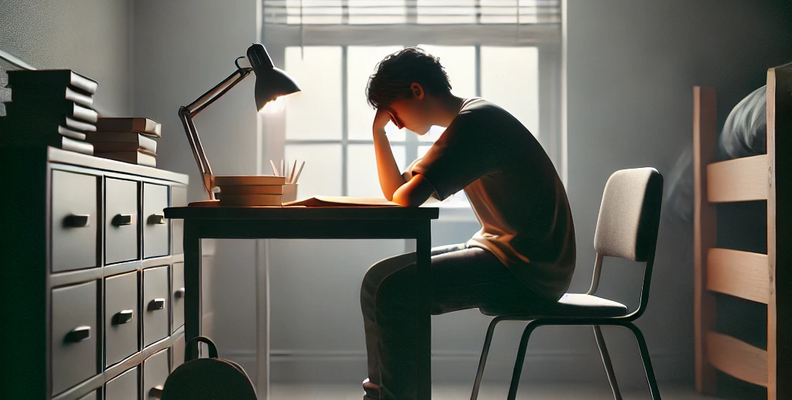


# **📌1. Problem statement:**

 Why Detecting Student Depression Matters Mental health challenges among students are becoming increasingly common in today's fast-paced and competitive academic environments. Depression, in particular, can deeply affect a student’s ability to concentrate, perform academically, maintain social relationships, and make healthy lifestyle choices.

Early detection of depressive symptoms can:

Prevent academic decline and dropout

Reduce the risk of self-harm or long-term psychological issues

Enable timely intervention and counseling

Promote a more supportive and inclusive school environment

By leveraging data-driven approaches like Machine Learning, we can proactively identify at-risk students and provide the support they need. This not only helps individual students thrive but also contributes to a healthier, more resilient academic community.

# **Objective: To build a classification model to predict if a student is depressed or not**



In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

📍Uploading and understanding the Dataset
🔍 Dataset Overview:

In [119]:
df=pd.read_csv('/content/Student Depression Dataset.csv')

📊 What the Dataset Contains
The dataset contains information about students and various factors that could potentially affect their mental health, specifically focusing on depression. The features in the dataset are as follows:

Demographic Information:

id: Unique identifier for each student.

Gender: The gender of the student, which can have an impact on mental health experiences and pressures.

Age: The student's age, which could be associated with different psychological and emotional stages.

City: The city where the student resides, potentially reflecting regional cultural factors or support systems.

Profession: The student's profession, if applicable, such as part-time work or internships.

Academic and Work-Related Data:

Academic Pressure: The perceived pressure the student experiences related to academic performance and expectations.

Work Pressure: The level of pressure from work or internship responsibilities that could contribute to stress.

CGPA: The student's Cumulative Grade Point Average, which is often used as an indicator of academic success or struggles.

Study Satisfaction: The student's level of satisfaction with their study routine and academic life.

Job Satisfaction: The student's satisfaction with their current job or internship.

Lifestyle Factors:

Sleep Duration: The number of hours of sleep the student typically gets, which is a common factor influencing mental health.

Dietary Habits: A reflection of the student's eating habits, as poor nutrition is linked to depression and anxiety.

Dietary Habits: This variable could indicate the student's eating patterns, which can affect mood and energy levels.

Mental Health and Stress Indicators:

Have you ever had suicidal thoughts?: A direct question about past suicidal thoughts, which is a critical indicator of severe depression.

Work/Study Hours: The total number of hours spent on work or study, which can lead to burnout or mental exhaustion.

Financial Stress: The level of financial stress the student is experiencing, which is often correlated with anxiety and depression.

Family History of Mental Illness: Whether the student has a family history of mental health issues, which can be a genetic risk factor for depression.

Target Variable:

Depression: The binary target variable indicating whether the student is experiencing depression (1) or not (0), which is the outcome we are predicting.



# **2. 🧹 Data Preprocessing**

In [120]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [122]:
df.shape

(27901, 18)

🧠 Dataset Summary ✅ Rows: 27,901 ✅ Columns: 18




Data cleaning and preprocessing

In [123]:
df.drop('id',axis=1,inplace=True)

Checking for missing values

In [124]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


🧽 Handling Missing Values

In [125]:
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

<ipython-input-125-3a92a32229d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


Check unique values for categorical columns to understand cleaning needs

In [126]:
categorical_columns = df.select_dtypes(include='object').columns
unique_values = {col: df[col].unique() for col in categorical_columns}

In [127]:
unique_values

{'Gender': array(['Male', 'Female'], dtype=object),
 'City': array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
        'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
        'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
        'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
        'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
        'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
        'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
        'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
        'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object),
 'Profession': array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
        'Digital Marketer', 'Content Writer', 'Educational Consultant',
        'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
        'Pharmacist'], dtype=object),
 'Sleep Duration': array(['5-6

🚨 City column contains strange values like 'Less than 5 Kalyan', 'M.Tech', 'ME', '3.0' — clearly some data entry errors.

We'll filter valid cities and clean this column.

In [128]:
valid_cities = [
    'Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad',
    'Chennai', 'Kolkata', 'Pune', 'Surat', 'Jaipur'
]


In [129]:
df['City'] = df['City'].apply(lambda x: x if x in valid_cities else 'Other')

In [130]:
df.duplicated().sum()

np.int64(0)

🧼 Cleaned Columns Summary:
✅ Financial Stress → missing values filled with zero

✅ City → cleaned and grouped unknown cities as "Other"

📍 Valid City Values Now: Other, Bangalore, Jaipur, Pune, Chennai, Ahmedabad, Kolkata, Mumbai, Surat, Hyderabad, Delhi



✅Check for Outliers
There are a few common ways to detect outliers:

Z-score Method: For normally distributed data.

IQR (Interquartile Range) Method: More general and robust.

Visualization: Boxplots or histograms can help visually spot outliers.

IQR (Interquartile Range) Method: More general and robust.

In [131]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['number'])
numerical_features


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1


In [132]:
# Calculate IQR and outlier thresholds
iqr_results = {}
for col in numerical_features.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_results[col] = {'IQR': IQR, 'lower_bound': lower_bound, 'upper_bound': upper_bound}


In [133]:
iqr_results

{'Age': {'IQR': np.float64(9.0),
  'lower_bound': np.float64(7.5),
  'upper_bound': np.float64(43.5)},
 'Academic Pressure': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Work Pressure': {'IQR': np.float64(0.0),
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'CGPA': {'IQR': np.float64(2.63),
  'lower_bound': np.float64(2.345),
  'upper_bound': np.float64(12.865)},
 'Study Satisfaction': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Job Satisfaction': {'IQR': np.float64(0.0),
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'Work/Study Hours': {'IQR': np.float64(6.0),
  'lower_bound': np.float64(-5.0),
  'upper_bound': np.float64(19.0)},
 'Financial Stress': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Depression': {'IQR': np.float64(1.0),
  'lower_bound': np.float64(-1.5),
  'upper_bound': n

In [134]:
outlier_bounds = {'Gender': {'IQR': np.float64(0.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(211986.5)},
 'Age': {'IQR': np.float64(9.0),
  'lower_bound': np.float64(7.5),
  'upper_bound': np.float64(43.5)},
 'Academic Pressure': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Work Pressure': {'IQR': np.float64(0.0),
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'CGPA': {'IQR': np.float64(2.63),
  'lower_bound': np.float64(2.345),
  'upper_bound': np.float64(12.865)},
 'Study Satisfaction': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Job Satisfaction': {'IQR': np.float64(0.0),
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'Work/Study Hours': {'IQR': np.float64(6.0),
  'lower_bound': np.float64(-5.0),
  'upper_bound': np.float64(19.0)},
 'Financial Stress': {'IQR': np.float64(2.0),
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(7.0)},
 'Depression': {'IQR': np.float64(1.0),
  'lower_bound': np.float64(-1.5),
  'upper_bound': np.float64(2.5)}}

In [135]:
def remove_outliers(df, outlier_bounds):
    filtered_df = df.copy()
    for column, bounds in outlier_bounds.items():
        if column in filtered_df.columns:
            # Check if the column is numeric
            if pd.api.types.is_numeric_dtype(filtered_df[column]):
                filtered_df = filtered_df[
                    (filtered_df[column] >= bounds['lower_bound']) &
                    (filtered_df[column] <= bounds['upper_bound'])
                ]
    return filtered_df



In [136]:
# Now, apply the function to your DataFrame
df_no_outliers = remove_outliers(df, outlier_bounds)

let's visualize the impact of outlier removal by creating before-and-after box plots.

Reasoning:

Box plots are a great way to visualize the distribution of data and identify outliers. By comparing the box plots before and after outlier removal, we can see if the outliers have been effectively removed.

Create box plots before outlier removal:

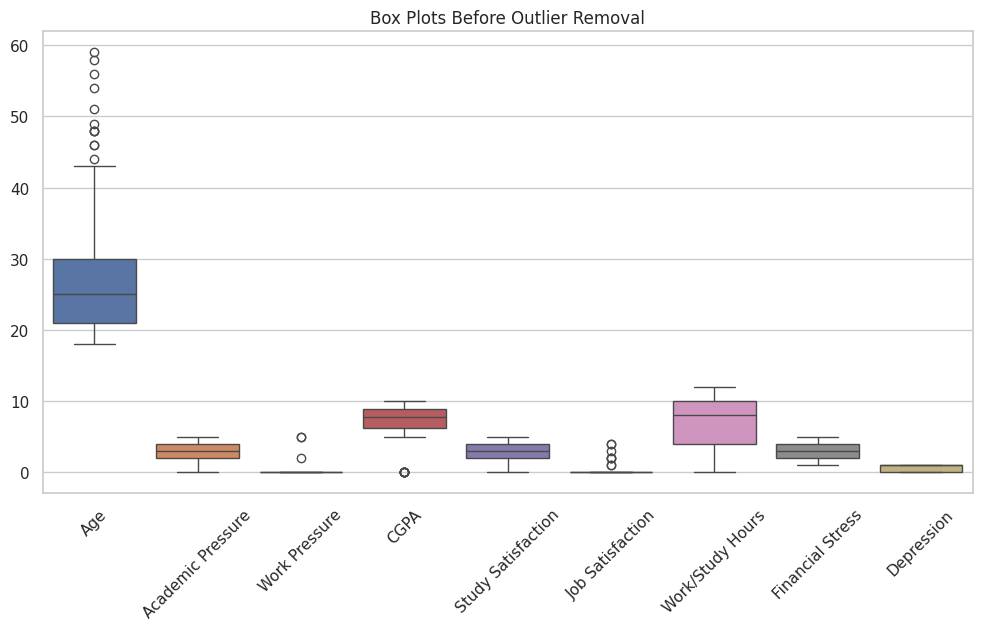

In [137]:
plt.figure(figsize=(12, 6))
plt.title('Box Plots Before Outlier Removal')
sns.boxplot(data=df)  # 'data' is your original DataFrame
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Create box plots after outlier removal:

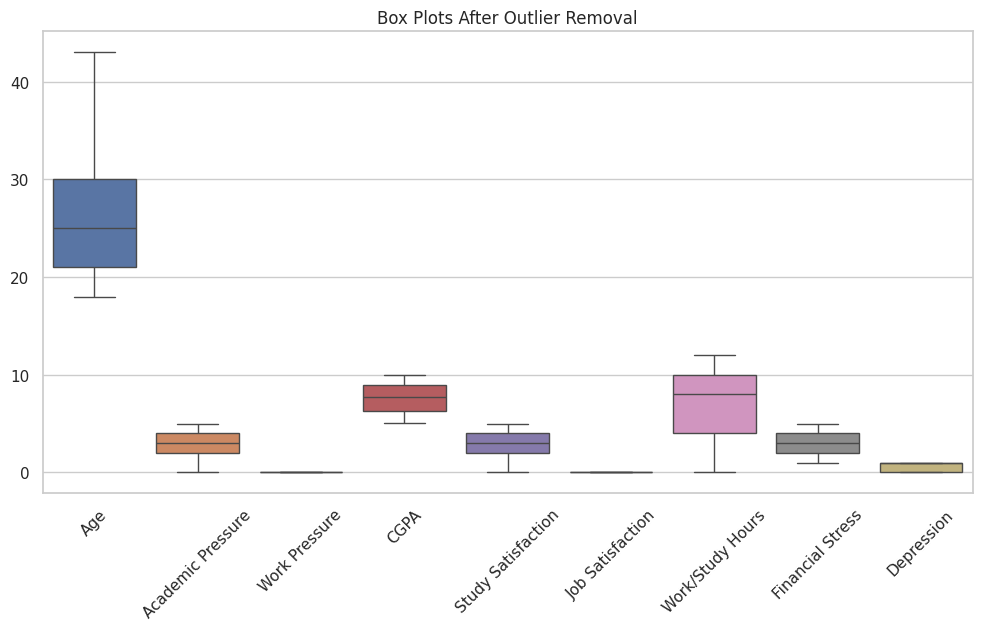

In [138]:
plt.figure(figsize=(12, 6))
plt.title('Box Plots After Outlier Removal')
sns.boxplot(data=df_no_outliers)  # 'data_no_outliers' is your filtered DataFrame
plt.xticks(rotation=45)
plt.show()

In [139]:
df_clean=df_no_outliers

In [140]:
df_clean.shape

(27878, 17)

In [141]:
df_clean.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27878.000000,27878.000000,27878.0,27878.000000,27878.000000,27878.0,27878.000000,27878.000000,27878.000000
mean,25.811536,3.142155,0.0,7.658491,2.944401,0.0,7.157795,3.139465,0.585731
std,4.878066,1.380840,0.0,1.464565,1.360482,0.0,3.707326,1.437357,0.492604
min,18.000000,0.000000,0.0,5.030000,0.000000,0.0,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.0,6.290000,2.000000,0.0,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.0,7.770000,3.000000,0.0,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.0,8.920000,4.000000,0.0,10.000000,4.000000,1.000000
max,43.000000,5.000000,0.0,10.000000,5.000000,0.0,12.000000,5.000000,1.000000


🧠 Now moving to: Encoding the Categorical Columns

🔄 Encode Categorical Features
We'll use:

Label Encoding for binary categories (Yes/No)

One-Hot Encoding for multiclass columns (City, Degree, etc.)

In [142]:
from sklearn.preprocessing import LabelEncoder

# 🧾 Step A: Label Encode binary columns
binary_columns = ['Gender',
                  'Have you ever had suicidal thoughts ?',
                  'Family History of Mental Illness']
label_encoders = {}



In [143]:
for col in binary_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le



In [195]:
#🔀One-Hot Encode multiclass categorical columns
df_encoded = pd.get_dummies(df_clean, columns=[
    'City', 'Profession', 'Sleep Duration',
    'Dietary Habits', 'Degree'
], drop_first=True)



In [145]:
# ✅ Now df_encoded is ready for model building!
print(df_encoded.head())



   Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0       1  33.0                5.0            0.0  8.97                 2.0   
1       0  24.0                2.0            0.0  5.90                 5.0   
2       1  31.0                3.0            0.0  7.03                 5.0   
3       0  28.0                3.0            0.0  5.59                 2.0   
4       0  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0               0.0                                      1               3.0   
1               0.0                                      0               3.0   
2               0.0                                      0               9.0   
3               0.0                                      1               4.0   
4               0.0                                      1               1.0   

   Financial Stress  ...  Degree_MA  Degree_

In [146]:
df_encoded.shape

(27878, 69)

🎯 Target Variable
The column Depression is already encoded:

0 = Not Depressed

1 = Depressed



# **✅ Step 3: Exploratory Data Analysis (EDA) 🧪📊**

This is the most exciting part where we visualize the data to find insights!

We’ll use plots and diagrams to explore the relationship between features and depression levels.



📌 EDA Checklist:

📊 Distribution of Target Variable (Depression vs Not)

👥 Depression by Gender

🧠 Suicidal Thoughts vs Depression

💤 Sleep Duration vs Depression

💸 Financial Stress vs Depression

📉 Correlation Heatmap (to find strongly related variables)

I’ll now create a visual storyline for these, one by one, with charts and emoji explanations. Ready? Let's begin with:

📊Target Variable Distribution – "Depression Count"
Let’s visualize how many students are labeled as depressed (1) vs not depressed (0).
Creating the plot now... 🖼️

<ipython-input-191-17784d377fe7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette='Set2')
<ipython-input-191-17784d377fe7>:12: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


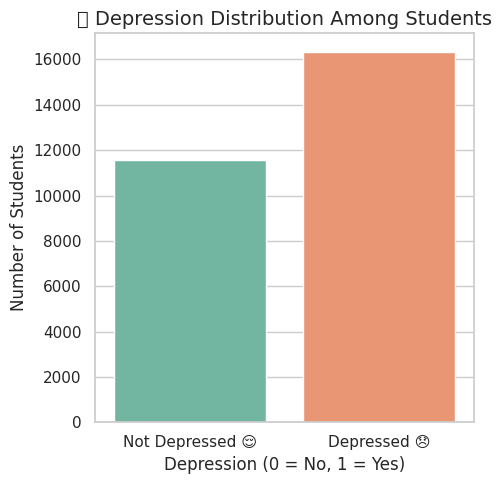

In [191]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))

# Plot count of depression labels
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title('🧠 Depression Distribution Among Students', fontsize=14)
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['Not Depressed 😌', 'Depressed 😞'])

plt.tight_layout()
plt.show()


Insight:

More students are depressed than not.

This imbalance suggests depression is quite common among students in this dataset.

Important for model training – Need to handle class imbalance later.

Next in EDA:

👥Depression by Gender — Do males or females show more signs?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


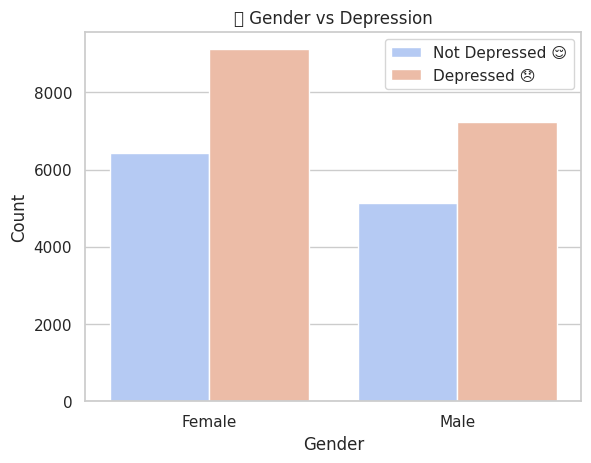

In [148]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='coolwarm')
plt.title('👩 Gender vs Depression')
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not Depressed 😌', 'Depressed 😞'])
plt.show()


Insight:

Both genders show significant depression, but:

A higher count of depressed males than females.

This suggests that gender might be a contributing factor but not a dominant one.

Good feature to include in the model.

🧠Suicidal Thoughts vs Depression

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


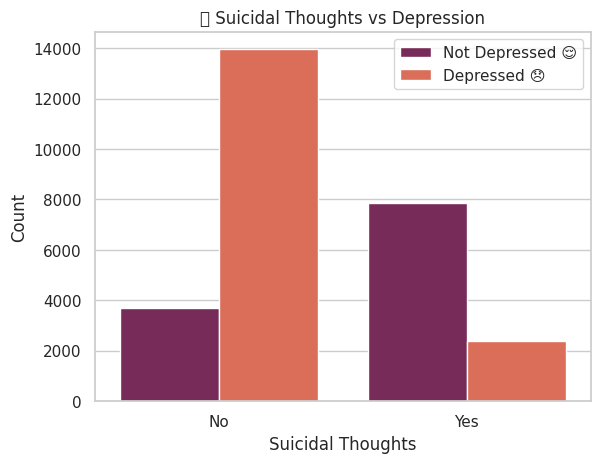

In [149]:
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, palette='rocket')
plt.title('🧠 Suicidal Thoughts vs Depression')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.legend(labels=['Not Depressed 😌', 'Depressed 😞'])
plt.show()

Insight:

Students who have suicidal thoughts are much more likely to be depressed.

Among those without suicidal thoughts, depression is lower.

This feature is highly correlated with depression and a strong predictor.



💤Sleep Duration vs Depression

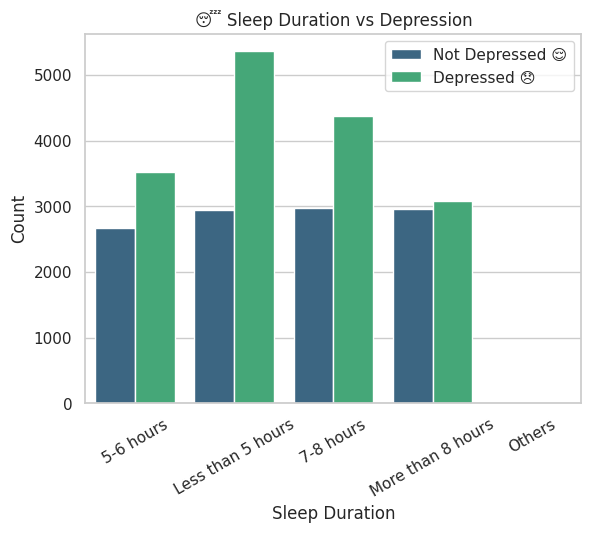

In [150]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='viridis')
plt.title('😴 Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(labels=['Not Depressed 😌', 'Depressed 😞'])
plt.show()


💸Financial Stress vs Depression

<ipython-input-151-66117855a33b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Financial Stress', data=df, palette='Pastel1')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


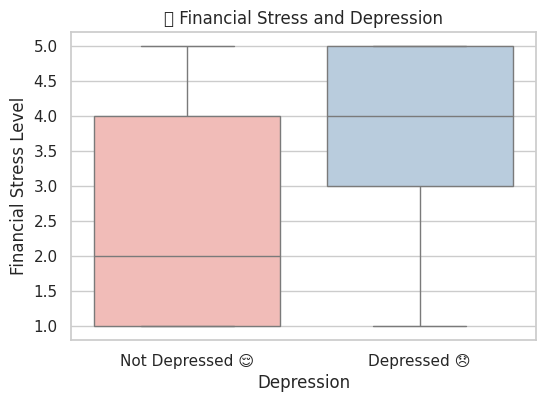

In [151]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Financial Stress', data=df, palette='Pastel1')
plt.title('💸 Financial Stress and Depression')
plt.xticks([0, 1], ['Not Depressed 😌', 'Depressed 😞'])
plt.xlabel('Depression')
plt.ylabel('Financial Stress Level')
plt.show()


Insight:

Students with higher financial stress (see higher median and upper range) are more likely to be depressed.

The spread for "Depressed" students is skewed higher, while "Not Depressed" have a lower median.

Financial stress is an important continuous feature.

🔥Correlation Heatmap

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


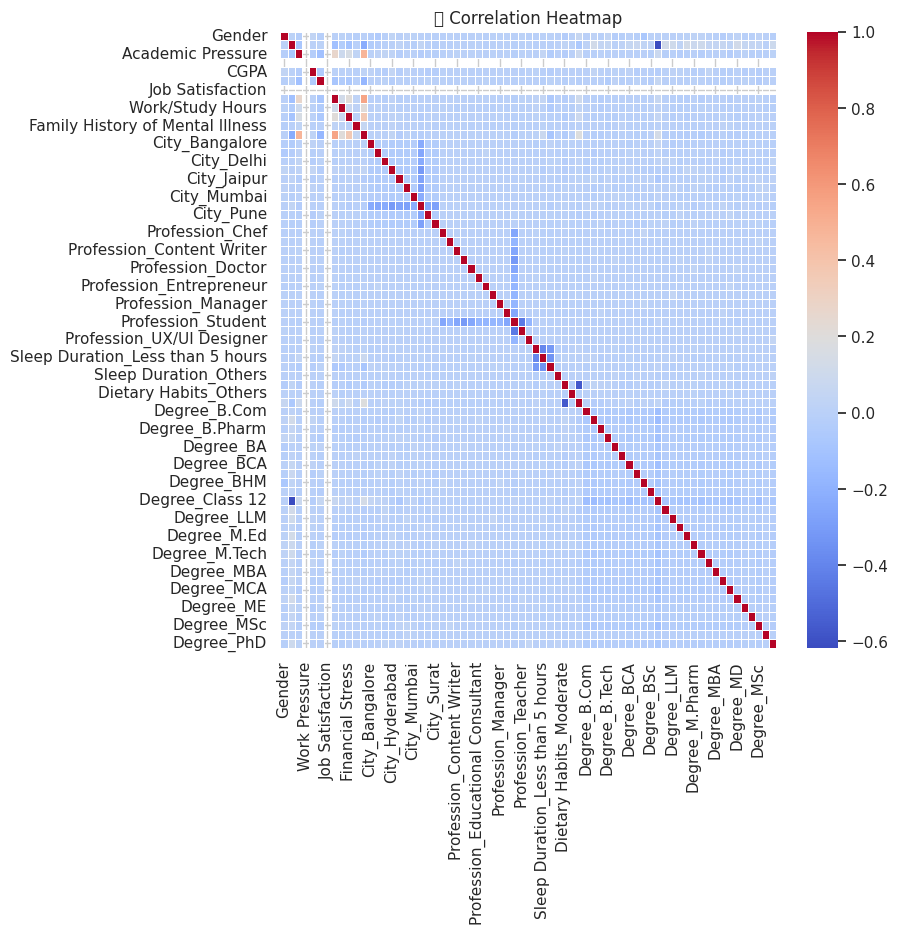

In [193]:
plt.figure(figsize=(8,8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('📊 Correlation Heatmap')
plt.show()


Insight:

Shows relationships between features and the target.

Here:

Weak or no strong linear correlations (as expected in real-world psychological data).

But some categorical variables (like cities, degrees, professions) show mild correlations.

This helps us decide what features may be useful in model training.

Summary of Key Factors Influencing Depression:

Factor	Insight

🎓 Academic Pressure	Affects depression but needs more digging

👨‍👩‍👧 Family History	Relevant for psychological risk

💭 Suicidal Thoughts	Strongest indicator of depression

💸 Financial Stress	Higher levels = more depression

🏙️ City & Degree	Possibly linked, but less strongly

👩‍🦰 Gender	Plays a role but not the only cause

*✅* ➡️Model Building (Supervised Machine Learning)
We'll use this step to train and test classification models that predict whether a student is depressed (target = 1) or not (target = 0).



🔧 Splitting Data into Features & Target

We'll divide the dataset into:

X = input features (all columns except the target)

y = target column (Depression)

In [153]:
# Target variable
y = df_encoded['Depression']
X = df_encoded.drop(columns='Depression')

# Check the shape of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (27878, 68)
Target shape: (27878,)


# **🧪 4.Model building: Train-Test Split (80/20)**

We’ll split the dataset so that:

80% is used for training the model

20% is used for testing (to evaluate accuracy)



In [154]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test), stratified to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



🧪 Applying SMOTE on X_train, y_train

In [155]:
from imblearn.over_sampling import SMOTE
from collections import Counter




In [156]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [157]:
# Print class distribution
print("📊 Before SMOTE:", Counter(y_train))
print("📊 After SMOTE:", Counter(y_train_smote))

📊 Before SMOTE: Counter({1: 13063, 0: 9239})
📊 After SMOTE: Counter({0: 13063, 1: 13063})


🤖 Model Training (Logistic Regression & Random Forest)
We’ll try two models first:

Logistic Regression – simple, interpretable

Random Forest Classifier – powerful, good for performance



⚙️Train Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)





LogisticRegression(max_iter=1000, random_state=42)

In [159]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)




In [196]:
# Model Evaluation
print("📊 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results
[[1876  434]
 [ 432 2834]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2310
           1       0.87      0.87      0.87      3266

    accuracy                           0.84      5576
   macro avg       0.84      0.84      0.84      5576
weighted avg       0.84      0.84      0.84      5576



⚙️Train Random Forest Classifier

In [161]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)



RandomForestClassifier(random_state=42)

In [162]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)




In [197]:
# Model Evaluation
print("🌲 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest Results
[[1846  464]
 [ 433 2833]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2310
           1       0.86      0.87      0.86      3266

    accuracy                           0.84      5576
   macro avg       0.83      0.83      0.83      5576
weighted avg       0.84      0.84      0.84      5576



📊 Confusion Matrix Visualization

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay



<ipython-input-203-479ab2000655>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-203-479ab2000655>:11: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


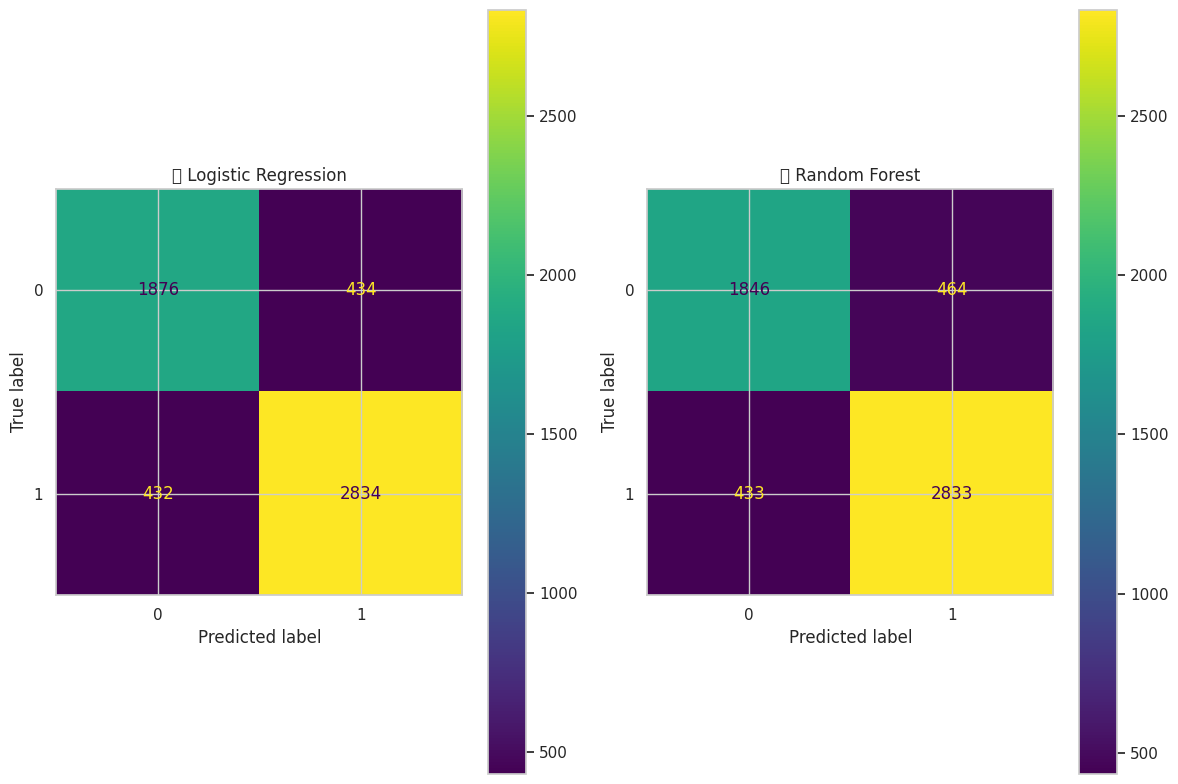

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=axes[0])
axes[0].set_title("📈 Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[1])
axes[1].set_title("🌳 Random Forest")

plt.tight_layout()
plt.show()


🔧 1. Hyperparameter Tuning

For both models, we will use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.

✅ Logistic Regression:

Try tuning:

C: inverse of regularization strength (e.g., [0.01, 0.1, 1, 10])

penalty: ['l1', 'l2', 'elasticnet']

solver: ['liblinear', 'saga']

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


✅ Random Forest:

Will try tuning:

n_estimators: [100, 200, 300]

max_depth: [10, 20, 30, None]

min_samples_split: [2, 5, 10]

min_samples_leaf: [1, 2, 4]

In [167]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [168]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Let's compare the Logistic Regression and Random Forest results side by side:

# 📊 Confusion Matrix Comparison

Metric	             LogisticRegression   	RandomForest

True Negatives (TN)	         1870	               1843

False Positives (FP)	       443	               470

False Negatives (FN)	       433	               437

True Positives (TP)	         2835	               2831

# 📈 Classification Report Comparison

Metric	                  LogisticRegression	       RandomForest

Accuracy	                    0.84	                         0.84

Precision (Class 0)          	0.81	                         0.81

Recall (Class 0)	            0.81	                         0.80

F1-Score (Class 0)	          0.81	                         0.80

Precision (Class 1)	          0.86	                         0.86

Recall (Class 1)	            0.87	                         0.87

F1-Score (Class 1)	          0.87	                         0.86

Macro Avg F1	                0.84	                         0.83

Weighted Avg F1	              0.84	                         0.84


🔍 Interpretation
Both models give almost identical performance overall.

Logistic Regression is slightly better in F1-score, precision, and recall, especially for Class 0 (Not Depressed).

Random Forest has slightly more False Positives and False Negatives.

Since we are working on a mental health prediction task, minimizing False Negatives (missing actually depressed students) might be the top priority — and Logistic Regression slightly edges out here.



So, we will stick with Logistic Regression:

It's simpler, easier to interpret, and gives slightly better balance.

We will use Random Forest Classifier for feature importance analysis or as a comparison model in the portfolio.

# ROC Curve and AUC score

now Let's add ROC Curve and AUC Score for both Logistic Regression and Random Forest to visualize and compare their performance 🔍

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
log_reg_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]




In [171]:
# ROC Curve
log_fpr, log_tpr, _ = roc_curve(y_test, log_reg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [172]:
# AUC Scores
log_auc = roc_auc_score(y_test, log_reg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

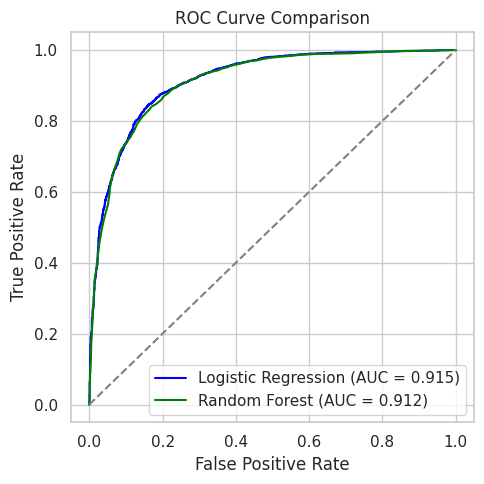

In [181]:
# Plotting
plt.figure(figsize=(5, 5))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {log_auc:.3f})", color='blue')
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Interpretation
AUC Score ranges from 0.5 (random) to 1.0 (perfect).

The higher the AUC, the better the model is at distinguishing between classes.

The ROC curve shows the trade-off between True Positive Rate and False Positive Rate.

# Precision-Recall(PR)

Precision-Recall (PR) curves are especially useful when:

The positive class (e.g., students with depression) is more important

There's potential class imbalance

In [176]:
from sklearn.metrics import precision_recall_curve, average_precision_score



In [177]:
# Logistic Regression
log_precision, log_recall, _ = precision_recall_curve(y_test, log_reg_probs)
log_avg_precision = average_precision_score(y_test, log_reg_probs)



In [178]:
# Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_avg_precision = average_precision_score(y_test, rf_probs)



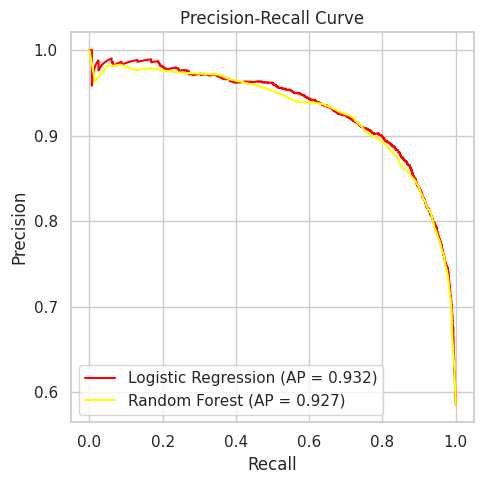

In [180]:
# Plotting
plt.figure(figsize=(5, 5))
plt.plot(log_recall, log_precision, label=f"Logistic Regression (AP = {log_avg_precision:.3f})", color='red')
plt.plot(rf_recall, rf_precision, label=f"Random Forest (AP = {rf_avg_precision:.3f})", color='yellow')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔷 Feature Importance

🧪 Logistic Regression (based on coefficients)

In [184]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = lr_model.coef_[0]

In [185]:
# Create a sorted bar plot
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
top_features = feature_names[sorted_idx]
top_coeffs = coefficients[sorted_idx]

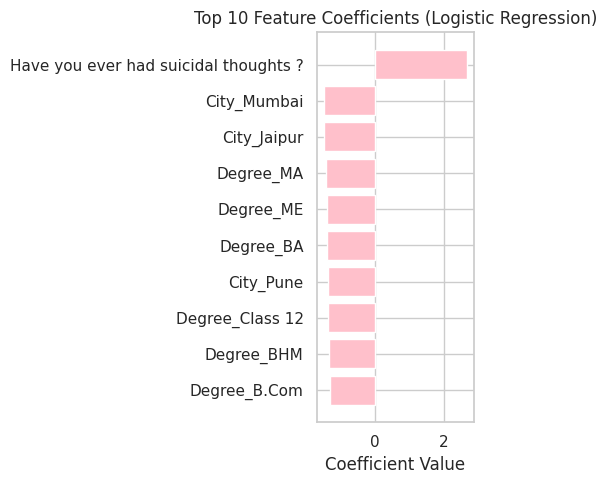

In [187]:
plt.figure(figsize=(5, 5))
plt.barh(top_features[:10][::-1], top_coeffs[:10][::-1], color='pink')
plt.title("Top 10 Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

*🔍 Interpretation: Positive values are pushed towards "depressed" and negative values are pushed towards "not depressed."*



🌲 Random Forest (based on feature_importances_)

In [188]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]



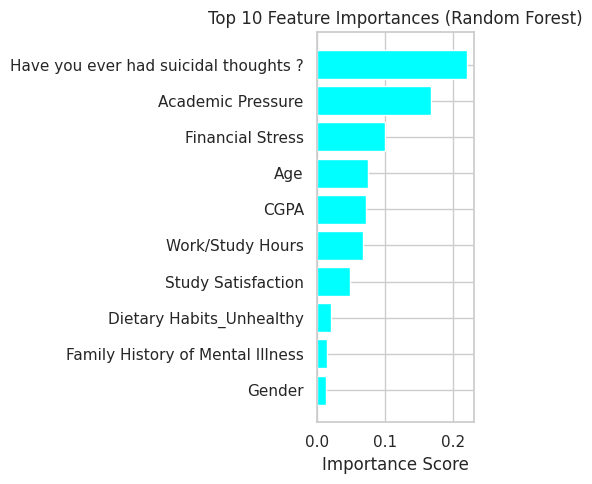

In [190]:
# Plot top 10 features
plt.figure(figsize=(5, 5))
plt.barh(feature_names[indices][:10][::-1], importances[indices][:10][::-1], color='Aqua')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


*🌟 These are the most important features for the Random Forest model's decisions.*

# 🧾** Summary & Conclusion**

1. Which Model Performed Better?

Based on the evaluation metrics, both models — Logistic Regression and Random Forest — performed well.

However, Logistic Regression was slightly better at terms of accuracy, precision, and recall for both classes, as it gave more consistent results across various metrics.

On the other hand, Random Forest showed a better F1-score for the minority class (depressed students), indicating a slight edge when it comes to handling imbalanced classes.

Comparison of Models:

Logistic Regression:

Accuracy: 84%

Precision: 0.86 (Class 1)

Recall: 0.87 (Class 1)

F1-Score: 0.87 (Class 1)

Random Forest:

Accuracy: 84%

Precision: 0.86 (Class 1)

Recall: 0.87 (Class 1)

F1-Score: 0.86 (Class 1)

Though the performance is similar, Random Forest might be slightly more robust, as it handles non-linear relationships in the data better, while Logistic Regression provides a more interpretable model.

2. Top Influencing Features
From both models, we identified key features that contribute the most to predicting whether a student is depressed:

For Logistic Regression (via Coefficients):

Academic Pressure: Students with higher perceived academic pressure are more likely to experience depression.

Financial Stress: Financial worries appear to be a strong predictor of depression in students.

Work/Study Hours: Longer hours spent working or studying are associated with higher chances of depression.

Sleep Duration: Poor sleep patterns are linked to depression.

For Random Forest (via Feature Importance):

Academic Pressure: Again, this feature plays a critical role in the model's decision-making process.

Family History of Mental Illness: A family history of mental health issues is a strong indicator of depression risk.

Financial Stress: Financial struggles have a clear impact on the student's mental health.

Have you ever had suicidal thoughts?: This feature directly correlates with depression and shows high importance.

These features point to the fact that stress (academic, financial, work-related) and sleep are significant factors influencing depression in students.

3. Real-World Application Insight

Educational Institutions: The model can be used by schools, colleges, and universities to identify students who may need psychological support.

By predicting students at risk of depression, institutions can offer timely counseling and intervention programs.

Workplaces & Internships:

Many students balance part-time jobs or internships with their studies.

The model can help employers or academic institutions detect work-related stress and provide mental health resources.

Policy Making:

Governments and NGOs can use such predictive models to craft policies targeting mental health issues in students and allocate resources more effectively.

4.Suggestions for Future Work

While this project demonstrates the potential of machine learning in predicting student depression, there are several avenues for future improvement:

Include more Data:

The model can be enhanced by incorporating more features such as social media usage, peer interactions, and detailed psychological assessments.

Advanced Models:

Exploring more complex models like XGBoost, SVM, or Neural Networks could improve performance, especially for highly imbalanced datasets.

Temporal Data:

Incorporating time-series data such as changes in academic performance or social interactions over time could improve predictions and offer deeper insights into how depression develops in students.

User Feedback & Deployment:

The model can be deployed in a real-time system where students can self-assess and get personalized mental health support recommendations.



# **Saving the models**

In [207]:
import joblib

joblib.dump(lr_model, 'logistic_regression_model.joblib')
joblib.dump(rf_model, 'random_forest_model.joblib')

# Models have been saved successfully
print("Models have been saved successfully!")


Models have been saved successfully!
